# Digimon Dataset Challenge from Kaggle:

[Dataset](https://www.kaggle.com/rtatman/digidb/home)

This project is more to refamiliarise myself with using numpy and pandas, and also give Jupyter a whirl.


In [2]:
# Install necessary packages

import sys

packages = ["numpy", "pandas", "seaborn", "matplotlib"]
for package in packages:
    !{sys.executable} -m pip install {package}

    100% |████████████████████████████████| 215kB 4.4MB/s ta 0:00:01
    100% |████████████████████████████████| 16.7MB 5.0MB/s ta 0:00:011
    100% |████████████████████████████████| 14.1MB 3.7MB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 11.6MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 8.8MB/s ta 0:00:01


In [5]:
# Necessary imports

import pandas as pd
import numpy as np

In [6]:
# Constants
digimon_list_path = "./digimon-database/DigiDB_digimonlist.csv"
digimon_moves_path = "./digimon-database/DigiDB_movelist.csv"
digimon_supports_path = "./digimon-database/DigiDB_supportlist.csv"

In [7]:
# Load datasets
digimon_df = pd.read_csv(digimon_list_path)
moves_df = pd.read_csv(digimon_moves_path)
supports_df = pd.read_csv(digimon_supports_path)

print("Digimon Details: \n{} \n {}".format(digimon_df.shape, digimon_df.columns))
print("Digimon moves: \n{} \n {}".format(moves_df.shape, moves_df.columns))
print("Digimon supports: \n{} \n {}".format(supports_df.shape, supports_df.columns))

Digimon Details: 
(249, 13) 
 Index(['Number', 'Digimon', 'Stage', 'Type', 'Attribute', 'Memory',
       'Equip Slots', 'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def',
       'Lv50 Int', 'Lv50 Spd'],
      dtype='object')
Digimon moves: 
(387, 7) 
 Index(['Move', 'SP Cost', 'Type', 'Power', 'Attribute', 'Inheritable',
       'Description'],
      dtype='object')
Digimon supports: 
(86, 2) 
 Index(['Name', 'Description'], dtype='object')


In [8]:
print(moves_df)

                        Move  SP Cost      Type  Power Attribute Inheritable  \
0              Wolkenapalm I        3  Physical     65      Fire         Yes   
1             Wolkenapalm II        6  Physical     85      Fire         Yes   
2            Wolkenapalm III        9  Physical    105      Fire         Yes   
3              Burst Flame I        3     Magic     55      Fire         Yes   
4             Burst Flame II        6     Magic     75      Fire         Yes   
5            Burst Flame III        9     Magic     95      Fire         Yes   
6              Meteor Fall I        4  Physical     30      Fire         Yes   
7             Meteor Fall II        7  Physical     45      Fire         Yes   
8            Meteor Fall III       10  Physical     75      Fire         Yes   
9                 Panic Wisp       10     Magic     30      Fire         Yes   
10             Ice Archery I        3  Physical     65     Water         Yes   
11            Ice Archery II        6  P

### Challenge 1: Which set of moves will get the best ratio of attack power to SP spent?

To do this, we create a numpy array with two columns:
* SP Cost
* Attack Power

We have the condition that no moves with an attack power of 0 are included.

We then calculate the ratios of Power to SP Cost by dividing power by SP Cost. The higher the resulting ratio, the better the power to cost ratio.

In [9]:
moves_matrix = moves_df.values
moves_matrix = moves_matrix[moves_matrix[:,3] > 0]
print("Deleted {} rows".format(moves_df.shape[0] - moves_matrix.shape[0]))
sp_cost = moves_matrix[:,1]
power = moves_matrix[:,3]

power_cost_ratio = np.divide(power, sp_cost)

Deleted 86 rows


To show the results, we'll display the results in a dataframe with two columns:
* Move Name
* Power to Cost Ratio

This will be sorted in descending order to show which moves have the highest power to cost ratio. To do this, we create an empty dataframe and add the columns manually.

In [10]:
# Create new matrix to add original matrix and extra column to
result_df = pd.DataFrame()
result_df["Moves"] = moves_matrix[:, 0]
result_df["Power_cost_ratios"] = power_cost_ratio

sorted_df = result_df.sort_values(by="Power_cost_ratios", ascending=False)
print(sorted_df)


                         Moves Power_cost_ratios
80              Heavy Strike I           23.3333
0                Wolkenapalm I           21.6667
10               Ice Archery I           21.6667
40              Comet Hammer I           21.6667
50                 Wind Claw I           21.6667
30         Nanomachine Break I           21.6667
60             Saint Knuckle I           21.6667
70        Destruction Cannon I           21.6667
20             Crescent Leaf I           21.6667
83              Power Energy I                20
156               Hyper Cannon                20
73                 Nightmare I           18.3333
53                Sonic Void I           18.3333
63                Holy Light I           18.3333
23              Gaia Element I           18.3333
3                Burst Flame I           18.3333
33          Heaven's Thunder I           18.3333
43                Grand Rock I           18.3333
13               Hydro Water I           18.3333
207             Atom

### Challenge 2: Which team of 3 digimon have the highest attack/defense?

Gonna split this into 3 parts:
* Team with the highest attack
* Team with the highest defense
* Team with the highest combination attack/defense

First step is get numpy array with 3 cols:
* Digimon name
* Attack
* Defense

In [11]:
digi_stats_df = digimon_df.loc[:, ['Digimon', 'Lv50 Atk', 'Lv50 Def']]
print(digi_stats_df.shape)
print(digi_stats_df)

(249, 3)
                  Digimon  Lv50 Atk  Lv50 Def
0                 Kuramon        79        69
1                 Pabumon        76        76
2                 Punimon        97        87
3                 Botamon        77        95
4                 Poyomon        54        59
5                 Koromon       109        93
6                 Tanemon        85        82
7                Tsunomon       107        92
8                Tsumemon       108        64
9                 Tokomon        76        74
10               Nyaromon        54        64
11                Pagumon        60        63
12                Yokomon        82        82
13                Bukamon        54        74
14                Motimon        82        81
15               Wanyamon        79        75
16                 Agumon       131       103
17           Agumon (Blk)       124       108
18           Armadillomon        67       111
19                 Impmon        83        65
20                Elecmon

#### Team with the highest attack
Steps:
1. Sort array by attack column
2. Select top 3 Digimon

In [12]:
print(digi_stats_df.sort_values(by='Lv50 Atk', ascending=False)[:3])

          Digimon  Lv50 Atk  Lv50 Def
243      Chaosmon       318        94
235  Belphemon RM       247       168
195    Diaboromon       243       104


#### Team with the highest defence
Steps:
1. Sort dataframe by defense column
2. Select top 3 Digimon


In [13]:
print(digi_stats_df.sort_values(by='Lv50 Def', ascending=False)[:3])

           Digimon  Lv50 Atk  Lv50 Def
181  GroundLocomon       144       213
182      Craniamon       124       208
238       Magnamon       168       208


#### Team with the highest combo attack defence
Steps:
1. Get sum of attack & defence column
2. Add to stats dataframe
3. Sort dataframe by combo column
4. Get top 3 digimon

In [14]:
attack_col = digi_stats_df.values[:, 1]
defense_col = digi_stats_df.values[:, 2]
combo_stats = np.add(attack_col, defense_col)

digi_stats_df["combo_stats"] = combo_stats
print(digi_stats_df)

                  Digimon  Lv50 Atk  Lv50 Def combo_stats
0                 Kuramon        79        69         148
1                 Pabumon        76        76         152
2                 Punimon        97        87         184
3                 Botamon        77        95         172
4                 Poyomon        54        59         113
5                 Koromon       109        93         202
6                 Tanemon        85        82         167
7                Tsunomon       107        92         199
8                Tsumemon       108        64         172
9                 Tokomon        76        74         150
10               Nyaromon        54        64         118
11                Pagumon        60        63         123
12                Yokomon        82        82         164
13                Bukamon        54        74         128
14                Motimon        82        81         163
15               Wanyamon        79        75         154
16            

In [15]:
print(digi_stats_df.sort_values(by='combo_stats', ascending=False)[:3])

          Digimon  Lv50 Atk  Lv50 Def combo_stats
235  Belphemon RM       247       168         415
243      Chaosmon       318        94         412
203  BanchoLeomon       193       188         381


### What's the tradeoff between HP and SP

Steps:
1. Get dataframe with Digimon number, HP, And SP
2. Calculate the correlation between HP and SP

In [27]:
digimon_analysis_df = digimon_df.loc[:, ["Lv 50 HP", "Lv50 SP"]]
print(digimon_analysis_df["Lv 50 HP"].corr(digimon_analysis_df["Lv50 SP"]))

0.07095683963849712


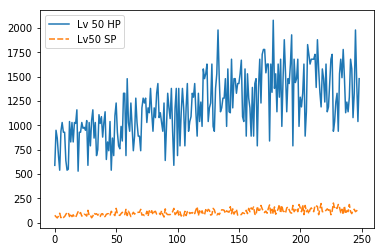

In [28]:
ax = sns.lineplot(data=digimon_analysis_df)

#### Conclusion
Correlation coefficient shows there really isn't much of a tradeoff between the HP and SP, and that both properties are actually fairly independent of each other.